In [18]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.sentiment_analysis import SentimentAnalysis
from scripts.thematic_analysis import ThematicAnalysis

from langdetect import detect

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 2


In [19]:
df_dashen = pd.read_csv('../data/Dashen_cleaned.csv')
df_boa = pd.read_csv('../data/BOA_cleaned.csv')
df_cbe = pd.read_csv('../data/CBE_cleaned.csv')
df = pd.concat([df_dashen,df_boa,df_cbe])

print(df.shape)
df.describe(include = 'object')

(2449, 5)


,review_text,date,bank_name,source
count,2449,2449,2449,2449
unique,1924,428,3,1
top,Good,2025-04-21,BOA,Google Play
freq,101,112,1000,2449


### Sentiment Analysis

In [20]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'
# Add a column with detected language
df['language'] = df['review_text'].apply(detect_language)

# Count how many are English
dashen_english_count = ((df['language'] == 'en') & (df['bank_name'] == 'Dashen Bank')).sum()
cbe_english_count = ((df['language'] == 'en') & (df['bank_name'] == 'CBE')).sum()
boa_english_count = ((df['language'] == 'en') & (df['bank_name'] == 'BOA')).sum()


In [21]:
total_reviews = len(df)
print(f'Total: {total_reviews}')
print(f'Dashen English count: {dashen_english_count}, CBE English count:{cbe_english_count} , BOA English count:{boa_english_count}')


Total: 2449
Dashen English count: 314, CBE English count:534 , BOA English count:636


In [22]:
df.head(10)

,review_text,rating,date,bank_name,source,language
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en
1,love,3,2025-06-06,Dashen Bank,Google Play,sl
2,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,error
3,wow,5,2025-06-03,Dashen Bank,Google Play,pl
4,gadaa,5,2025-06-01,Dashen Bank,Google Play,so
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en
6,good,4,2025-05-31,Dashen Bank,Google Play,so
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en
8,top,5,2025-05-31,Dashen Bank,Google Play,en
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en


In [23]:
sa = SentimentAnalysis(df)
sa.remove_amharic_rows()
sa.emoji_to_text()
sa.sentiment_analysis_distilbert()

Device set to use cuda:0
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['review_clean'] = self.df['review_text'].apply(convert_emoji_to_text)
100%|██████████| 1484/1484 [00:52<00:00, 28.21it/s]
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[['sentiment_label', 'sentimen

In [24]:
sa.df.head()

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en,I like this mobile banking app very much. Over...,NEGATIVE,0.990445,-1,-0.990445
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en,very good for this app,POSITIVE,0.999814,1,0.999814
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en,this app better than Amole . but the biometric...,NEGATIVE,0.999608,-1,-0.999608


In [25]:
sa.sentiment_analysis_text_blob()

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sentiment'] = self.df['review_text'].apply(get_sentiment)


In [26]:
sa.df.head(10)

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment,sentiment
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en,I like this mobile banking app very much. Over...,NEGATIVE,0.990445,-1,-0.990445,0.333333
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642,0.000000
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en,very good for this app,POSITIVE,0.999814,1,0.999814,0.910000
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707,0.500000
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en,this app better than Amole . but the biometric...,NEGATIVE,0.999608,-1,-0.999608,0.318182
12,wow to it saff and this app,5,2025-05-30,Dashen Bank,Google Play,en,wow to it saff and this app,POSITIVE,0.998571,1,0.998571,0.100000
13,it too slow,3,2025-05-29,Dashen Bank,Google Play,en,it too slow,NEGATIVE,0.999680,-1,-0.999680,-0.300000
15,real life changer,5,2025-05-28,Dashen Bank,Google Play,en,real life changer,POSITIVE,0.999779,1,0.999779,0.200000
22,Game changer app! Dashen Bank Super App is fas...,5,2025-05-26,Dashen Bank,Google Play,en,Game changer app! Dashen Bank Super App is fas...,POSITIVE,0.999617,1,0.999617,0.297436
23,very useful App,1,2025-05-26,Dashen Bank,Google Play,en,very useful App,POSITIVE,0.999579,1,0.999579,0.390000


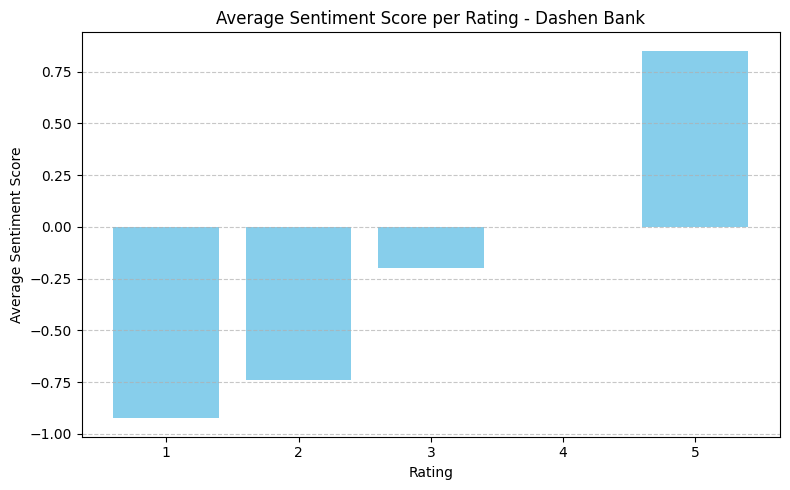

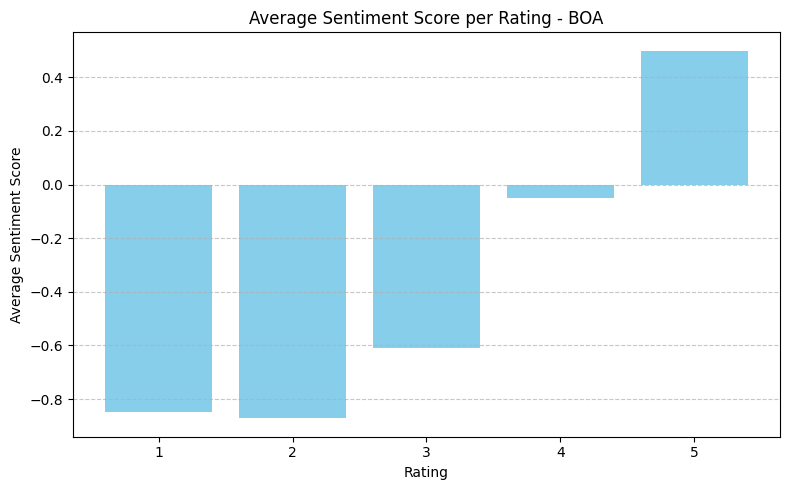

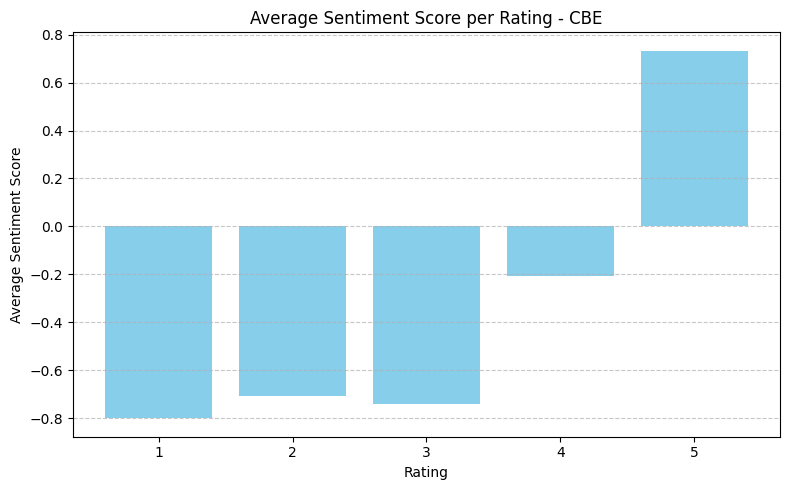

In [27]:
sa.plot_sentiment_by_rating()

### Thematic  Analysis

In [28]:
ta = ThematicAnalysis(sa.df)

- Thematic analysis pipeline

In [29]:
ta.apply_preprocessing()
ta.apply_keyword_extraction()
ta.apply_theme_assignment()
ta.save_as_csv()
ta.df.head()

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['tokens'] = self.df['review_clean'].astype(str).apply(self.preprocess_text)
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["keywords"] = self.df["review_clean"].apply(self.extract_keywords)
c:\Users\hanna\OneDrive\Desktop\KAI

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment,sentiment,tokens,keywords,themes
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en,I like this mobile banking app very much. Over...,NEGATIVE,0.990445,-1,-0.990445,0.333333,"[like, mobile, banking, app, overall, user, in...","[someone, navigation, i, money, it, overall us...","[User Interface & Experience, General Satisfac..."
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642,0.000000,"[massive, upgrade, amole, app]","[the amole app, massive upgrade]",[Uncategorized]
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en,very good for this app,POSITIVE,0.999814,1,0.999814,0.910000,"[good, app]",[this app],[General Satisfaction]
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707,0.500000,[],[],[Uncategorized]
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en,this app better than Amole . but the biometric...,NEGATIVE,0.999608,-1,-0.999608,0.318182,"[app, well, amole, biometric, new, update, work]","[amole, new update]",[Feature Requests]


# Task 4

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], data=bank_data, x='themes',
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], data=bank_data, x='themes',
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



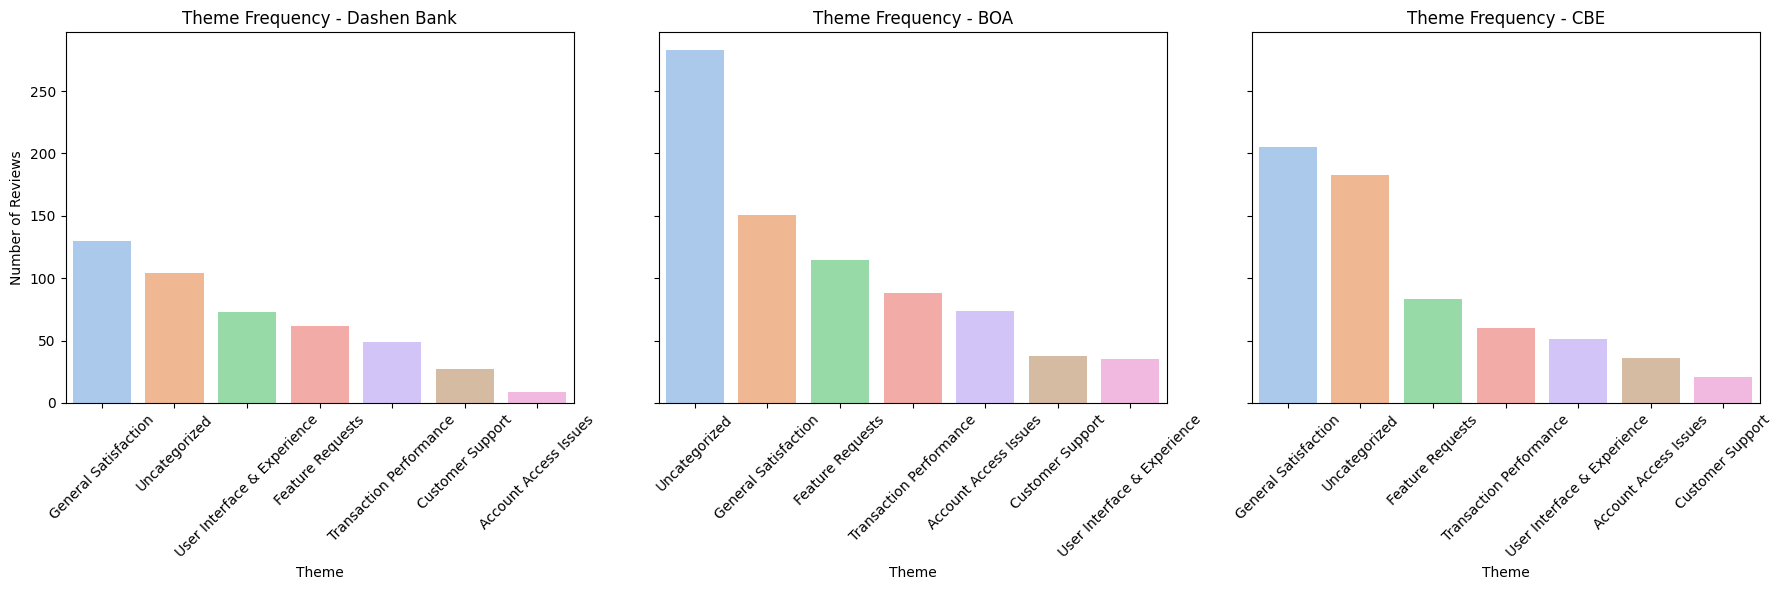

In [30]:
ta.plot_themes_frequency_per_bank()

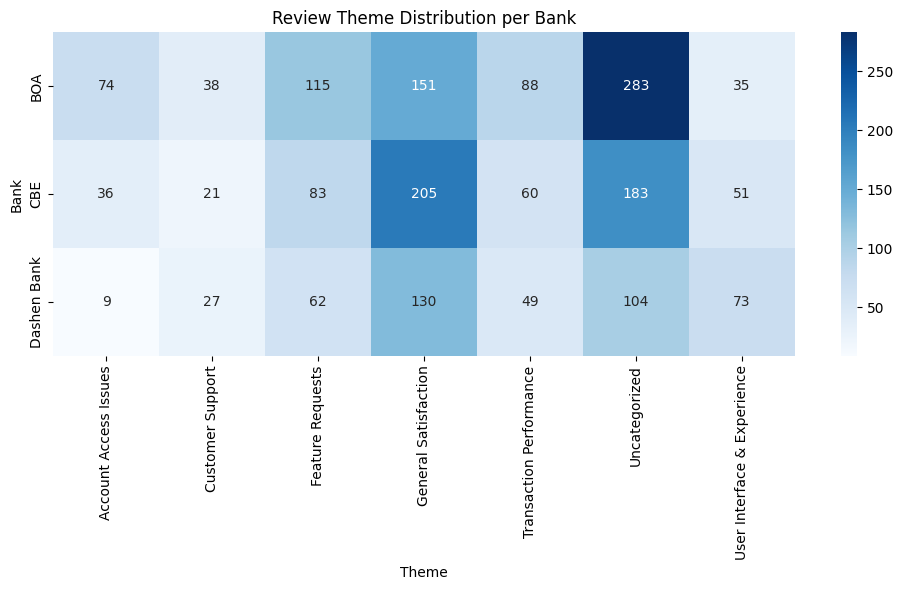

In [31]:
ta.plot_heatmap()

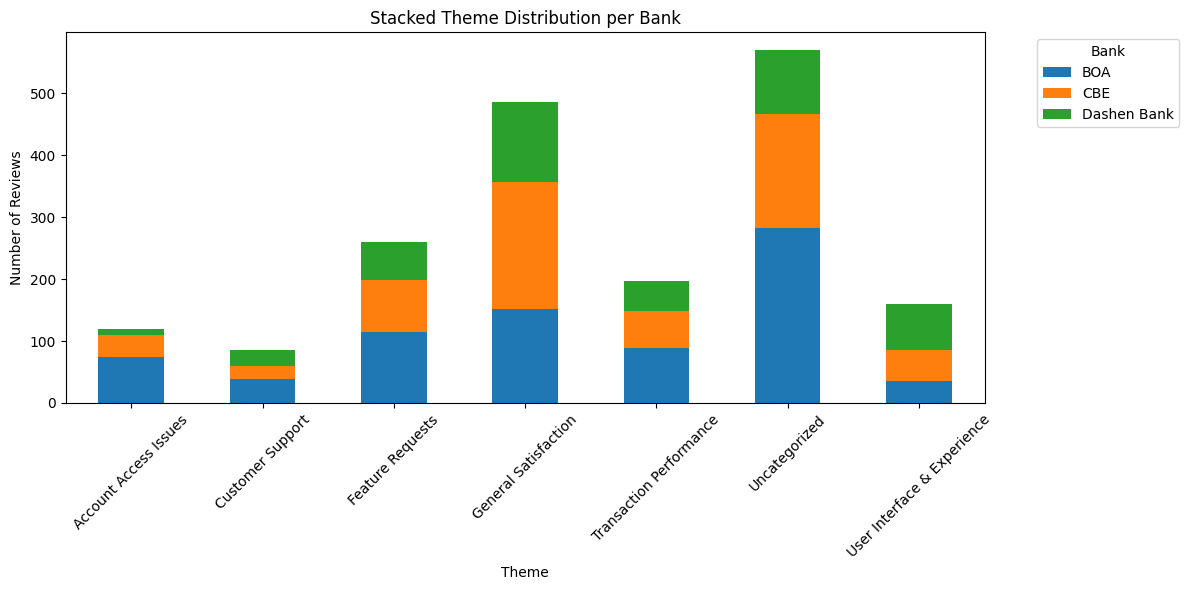

In [32]:
ta.plot_stacked_chart()

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:115: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


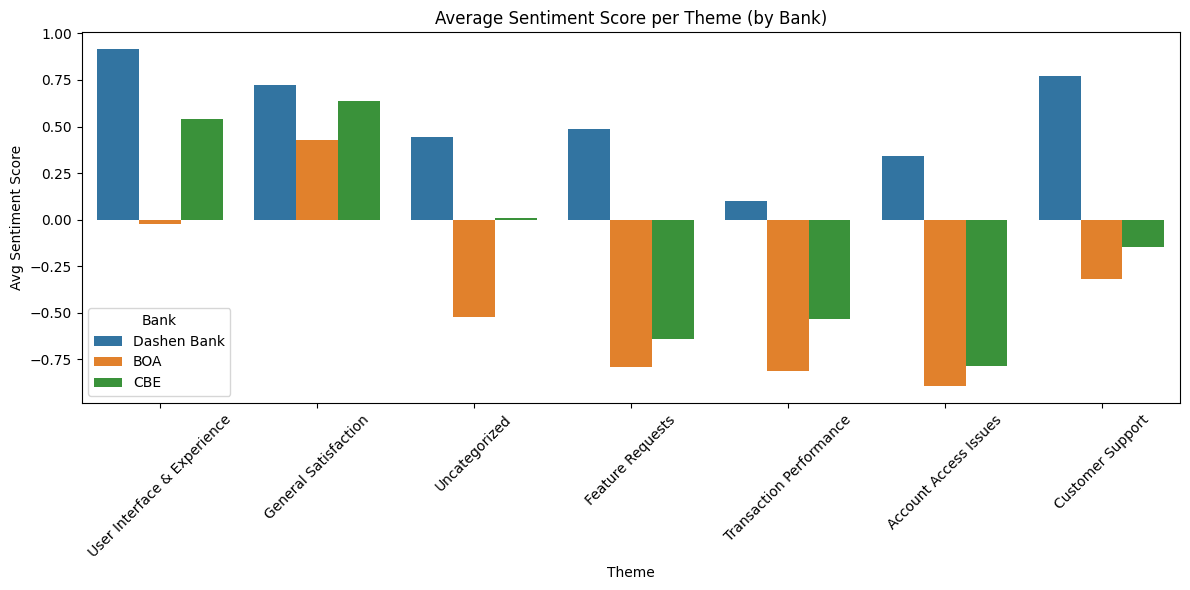

In [33]:
ta.plot_average_sentiment_by_theme()

- **Sentiment Trend Plot**

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['date_month'] = self.df['date'].dt.to_period('M').dt.to_timestamp()


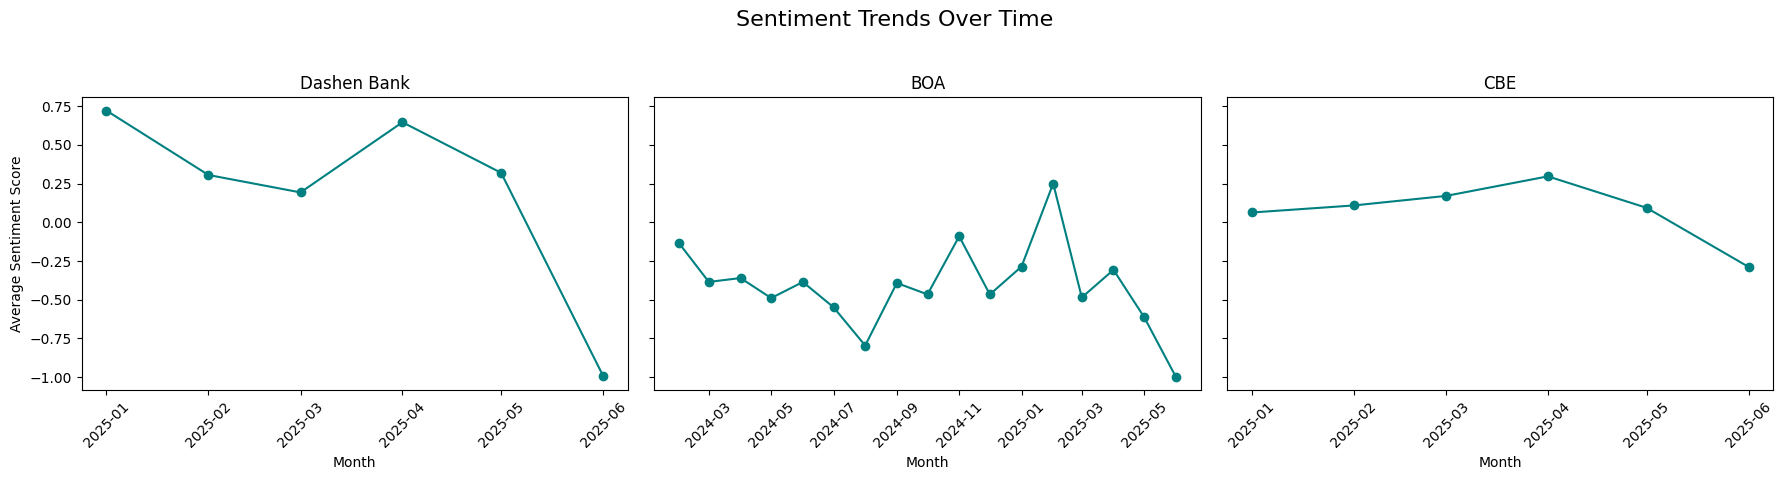

In [34]:
sa.plot_sentiment_trend()

- **Rating Distribution**

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_data, x='rating', ax=axes[i], palette='Blues')
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_data, x='rating', ax=axes[i], palette='Blues')
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

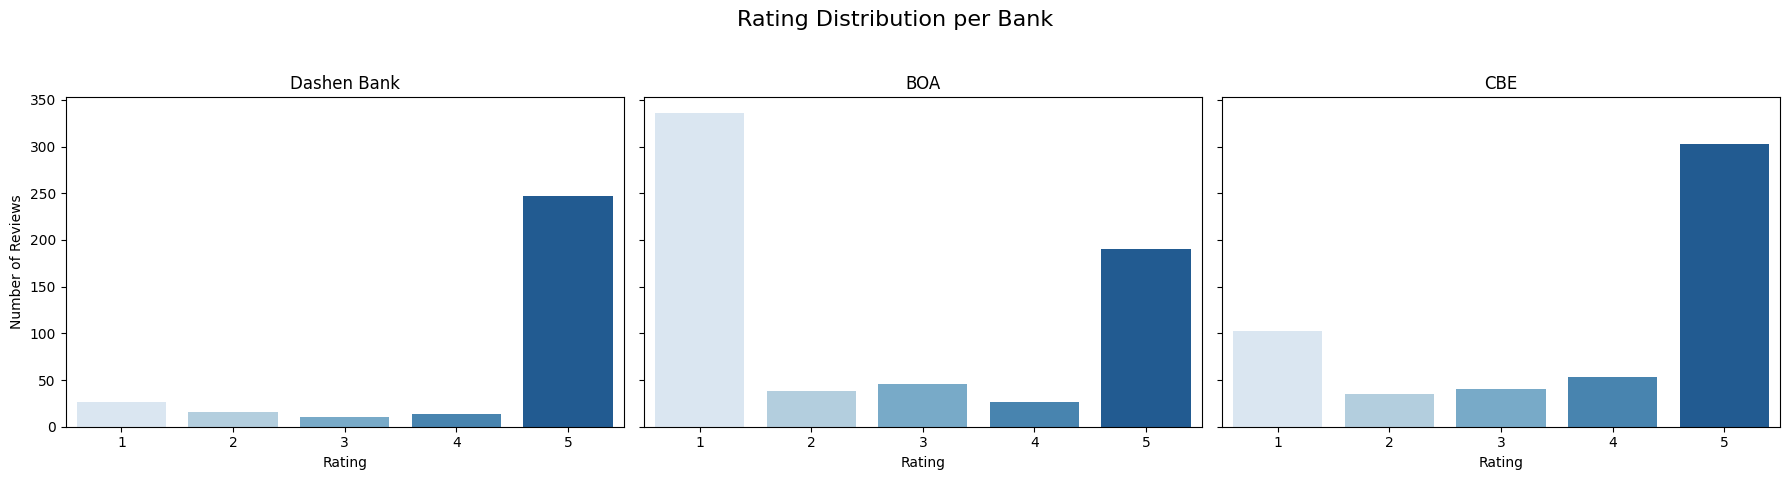

In [35]:
sa.plot_rating_distribution_plot()

In [36]:
ta.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, 0 to 998
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   review_text       1484 non-null   object        
 1   rating            1484 non-null   int64         
 2   date              1484 non-null   datetime64[ns]
 3   bank_name         1484 non-null   object        
 4   source            1484 non-null   object        
 5   language          1484 non-null   object        
 6   review_clean      1484 non-null   object        
 7   sentiment_label   1484 non-null   object        
 8   sentiment_score   1484 non-null   float64       
 9   sentiment_value   1484 non-null   int64         
 10  scaled_sentiment  1484 non-null   float64       
 11  sentiment         1484 non-null   float64       
 12  tokens            1484 non-null   object        
 13  keywords          1484 non-null   object        
 14  themes            1484 non-nul

- Manually inspecting the uncategorized reviews



In [37]:
uncategorized_reviews = ta.df[ta.df['themes'].apply(lambda x: x == ["Uncategorized"])]
uncategorized_reviews.head(20)

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment,sentiment,tokens,keywords,themes,date_month
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642,0.000000,"[massive, upgrade, amole, app]","[the amole app, massive upgrade]",[Uncategorized],2025-05-01
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707,0.500000,[],[],[Uncategorized],2025-05-01
12,wow to it saff and this app,5,2025-05-30,Dashen Bank,Google Play,en,wow to it saff and this app,POSITIVE,0.998571,1,0.998571,0.100000,"[wow, saff, app]","[this app, it]",[Uncategorized],2025-05-01
15,real life changer,5,2025-05-28,Dashen Bank,Google Play,en,real life changer,POSITIVE,0.999779,1,0.999779,0.200000,"[real, life, changer]",[real life changer],[Uncategorized],2025-05-01
23,very useful App,1,2025-05-26,Dashen Bank,Google Play,en,very useful App,POSITIVE,0.999579,1,0.999579,0.390000,"[useful, app]",[very useful app],[Uncategorized],2025-05-01
37,dashen bank or dashen super app?,1,2025-05-17,Dashen Bank,Google Play,en,dashen bank or dashen super app?,NEGATIVE,0.993753,-1,-0.993753,0.333333,"[dashen, bank, dashen, super, app]","[dashen super app, dashen bank]",[Uncategorized],2025-05-01
45,its my choice,5,2025-05-15,Dashen Bank,Google Play,en,its my choice,POSITIVE,0.996201,1,0.996201,0.000000,[choice],[its my choice],[Uncategorized],2025-05-01
54,what a helpful app!!!!,5,2025-05-13,Dashen Bank,Google Play,en,what a helpful app!!!!,POSITIVE,0.999090,1,0.999090,0.000000,"[helpful, app]",[],[Uncategorized],2025-05-01
60,"A must have, seamless, all in one digital plat...",5,2025-05-12,Dashen Bank,Google Play,en,"A must have, seamless, all in one digital plat...",POSITIVE,0.996646,1,0.996646,0.050000,"[seamless, digital, platform, db, superapp, li...","[always one step, your motto, db superapp, a, ...",[Uncategorized],2025-05-01
67,I am highly excited by using this application ...,5,2025-05-03,Dashen Bank,Google Play,en,I am highly excited by using this application ...,POSITIVE,0.999518,1,0.999518,0.437500,"[highly, excited, application, favorable, pref...","[this application, i, it]",[Uncategorized],2025-05-01
